# Zadatak1:  Simulirano kaljenje

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definisanje ciljne funkcije
def f(x):
    return 4/3 * (x[0]**2 + x[1]**2 - x[0]*x[1])**0.75 + x[2]

In [3]:
# Funkcija za generisanje početnog rešenja
def generate_initial_solution():
    
    """
    Generiše početno rešenje za algoritam.
    
    Returns:
    - Početno rešenje u obliku vektora dužine 3 sa nasumičnim vrednostima
      uniformne distribucije između 0 i 2.
      
    """
    
    # Generiše se vektor sa tri nasumična broja iz uniformne distribucije između 0 i 2.
    # Argument size=3 osigurava da se generiše vektor dužine 3.
    initial_solution = np.random.uniform(0, 2, size=3)
    
    return initial_solution

In [4]:
initial_solution = generate_initial_solution()
print(initial_solution)

[1.01541845 0.02553449 1.88922871]


In [5]:
# Funkcija za generisanje susednog rešenja
def generate_neighbor(solution, scale=0.1):
    
    """
    Generiše susedno rešenje na osnovu trenutnog rešenja.
    
    Args:
    - solution: Niz koji predstavlja trenutno rešenje.
    - scale: Parametar koji kontroliše "veličinu koraka" u generisanju susednog rešenja.
    
    Returns:
    - Novo generisano susedno rešenje.
    
    """
    # Generiše se vektor sa nasumičnim vrednostima uniformne distribucije između -scale i scale za svaku dimenziju rešenja.
    # Ovo se radi tako što se trenutnom rešenju dodaju nasumične vrednosti iz uniformne distribucije.
    # Argument size=len(solution) osigurava da se generiše vektor odgovarajuće dimenzije.
    random_values = np.random.uniform(-scale, scale, size=len(solution))
    
    # Novo rešenje se generiše dodavanjem nasumičnih vrednosti trenutnom rešenju.
    new_solution = solution + random_values
    
    # Provera da li su vrednosti unutar intervala [0, 2] i korigovanje ako nisu
    new_solution = np.clip(new_solution, 0, 2)
    
    return new_solution

In [6]:
new_solution = generate_neighbor(initial_solution)
print(new_solution)

[0.92990718 0.         1.89618511]


In [7]:
# Simulirano kaljenje
def simulated_annealing(f, initial_solution, initial_temperature=100, cooling_rate=0.95, num_iterations=1000):
    
    """
    Implementacija algoritma simuliranog kaljenja za optimizaciju.
    
    Args:
    - f: Ciljna funkcija koju treba minimizovati.
    - initial_solution: Početno rešenje.
    - initial_temperature: Početna temperatura.
    - cooling_rate: Stopa hlađenja.
    - num_iterations: Broj iteracija algoritma.
    
    Returns:
    - solutions: Lista vrednosti ciljne funkcije u trenutnim rešenjima po iteracijama.
    - best_solutions: Lista vrednosti ciljne funkcije u najboljim rešenjima do sada po iteracijama.
    
    """
    # Inicijalizacija temperature
    temperature = initial_temperature
    temperatures = [temperature]
    
    # Inicijalizacija početnog i najboljeg rešenja
    current_solution = initial_solution
    best_solution = initial_solution
    
    # Inicijalizacija početne i najbolje vrednosti ciljne funkcije
    current_value = f(current_solution)
    best_value = current_value
    
    # Lista za čuvanje vrednosti ciljne funkcije u trenutnim rešenjima po iteracijama
    solutions = [current_value]
    
    # Lista za čuvanje vrednosti ciljne funkcije u najboljim rešenjima do sada po iteracijama
    best_solutions = [best_value]
    
    # Glavna petlja algoritma simuliranog kaljenja
    for i in range(num_iterations):
        
        # Generisanje susednog rešenja
        neighbor_solution = generate_neighbor(current_solution)
        
        # Izračunavanje promene ciljne funkcije
        delta = f(neighbor_solution) - current_value
        
        # Prihvatanje ili odbacivanje susednog rešenja
        if delta < 0 or np.random.rand() < np.exp(-delta / temperature):
            current_solution = neighbor_solution
            current_value = f(current_solution)
            
            # Ažuriranje najboljeg rešenja ako je trenutno rešenje bolje
            if current_value < best_value:
                best_solution = current_solution
                best_value = current_value
        
        # Hlađenje temperature
        temperature *= cooling_rate
        temperatures.append(temperature)
        
        # Ispisujemo korake
        #print(f"Iteracija {i+1}: Trenutno rešenje: {current_solution}, 
              #Vrednost: {current_value}, Najbolje rešenje: {best_solution}, Najbolja vrednost: {best_value}")
        
        # Čuvanje vrednosti ciljne funkcije u trenutnom i najboljem rešenju
        solutions.append(current_value)
        best_solutions.append(best_value)
    
    return temperatures, solutions, best_solutions

## Simulirano kaljenje

Simulirano kaljenje
Simulirano kaljenje je metaheuristička optimizaciona tehnika inspirisana procesom kaljenja metala. Osnovna ideja je simulirati proces zagrevanja i hlađenja materijala kako bi se postigla optimalna struktura materijala. U kontekstu optimizacije, simulirano kaljenje počinje od početnog rešenja i primenjuje lokalnu pretragu sa dodatkom stohastičnosti. Ključna komponenta ovog algoritma je temperatura, koja se postepeno smanjuje tokom iteracija.

Na početku algoritma, visoka temperatura omogućava algoritmu da prihvati lošija rešenja sa većom verovatnoćom. Ovo omogućava algoritmu da istražuje šire područje rešenja, čime se povećava šansa za izbegavanje lokalnih optimuma.

Tokom iteracija, temperatura se postepeno smanjuje. Smanjenje temperature dovodi do smanjenja verovatnoće prihvatanja lošijih rešenja.

In [48]:
def run_experiment(f, initial_temperature, cooling_rate, num_iterations):
    
    """
    Izvršava eksperiment simuliranog kaljenja sa zadatim rasporedom hlađenja.

    Args:
    - cooling_rate: Faktor koji određuje brzinu hlađenja u simuliranom kaljenju.

    Returns:
    - None (rezultati se prikazuju grafikom).
    
    """
    
    num_trials = 100  # Broj ponavljanja eksperimenta
    num_iterations = 1000  # Broj iteracija u svakom eksperimentu

    all_solutions = []  # Lista za čuvanje svih vrednosti ciljne funkcije za trenutno rešenje
    all_best_solutions = []  # Lista za čuvanje svih vrednosti ciljne funkcije za najbolje pronađeno rešenje
    all_iterations_to_best = []  # Lista za čuvanje broja iteracija do najboljeg rešenja
    all_min = [] # Lista za cuvanje najboljih min vrednosti ciljne funkcije za svaki eksperiment

    # Petlja koja izvršava simulirano kaljenje za svaki od num_trials eksperimenata
    for _ in range(num_trials):
        
        # Generisanje početnog rešenja za svaki eksperiment
        initial_solution = generate_initial_solution()

        # Pokretanje simuliranog kaljenja i čuvanje rezultata
        temperatures, solutions, best_solutions = simulated_annealing(f, initial_solution, initial_temperature, cooling_rate=cooling_rate, num_iterations=num_iterations)
        
        all_solutions.append(solutions)
        all_best_solutions.append(best_solutions)
        
        # Pronalaženje indeksa najbolje vrednosti ciljne funkcije u listi najboljih rešenja
        best_index = np.argmin(best_solutions)

        # Broj iteracija do najboljeg rešenja
        iterations_to_best = best_index + 1  # Dodajemo 1 jer indeksi počinju od 0

        # Dodavanje broja iteracija do najboljeg rešenja u listu
        all_iterations_to_best.append(iterations_to_best)
        
        # Dodavanje najbolje(min) vrednosti funkcije u listu
        all_min.append(best_solutions[-1])
        
    # Izračunavanje srednje vrednosti ciljne funkcije po iteracijama
    avg_solutions = np.mean(all_solutions, axis=0)
    avg_best_solutions = np.mean(all_best_solutions, axis=0)

    # Prvo prikažemo grafike prvog reda
    plt.figure(figsize=(15, 10))

    # Prvi grafik: Zavisnost rešenja od broja iteracija
    plt.subplot(2, 2, 1)
    plt.plot(avg_solutions, label='Trenutno rešenje')
    plt.plot(avg_best_solutions, label='Najbolje rešenje do sada')
    plt.xlabel('Broj iteracija')
    plt.ylabel('Vrednost ciljne funkcije')
    plt.title('Usrednjeno trenutno i najbolje resenje kroz iteracije')
    plt.legend()

    # Drugi grafik: Promena temperature kroz iteracije 
    plt.subplot(2, 2, 2)
    plt.plot(temperatures, label='Temperature')
    plt.xlabel('Broj iteracija')
    plt.ylabel('Temperatura')
    plt.title('Promena temperature kroz iteracije')
    plt.legend()
    
    # Treći grafik: Histogram najboljih (minimalnih) vrednosti ciljne funkcije
    plt.subplot(2, 2, 3)
    plt.hist(all_min, bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram najboljih (minimalnih) vrednosti ciljne funkcije (Simulirano kaljenje)')
    plt.xlabel('Minimalna vrednost ciljne funkcije')
    plt.ylabel('Frekvencija')
    plt.grid(True)
    
    # Četvrti grafik: Histogram broja generisanih kandidata do pronalaska najboljeg rešenja
    plt.subplot(2, 2, 4)
    plt.hist(all_iterations_to_best, bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram broja generisanih kandidata do pronalaska najboljeg rešenja (Simulirano kaljenje)')
    plt.xlabel('Broj kandidata')
    plt.ylabel('Frekvencija')
    plt.grid(True)

    plt.tight_layout()  
    plt.show()
    
    return all_iterations_to_best, all_min

In [58]:
# Postavljanje parametara simuliranog kaljenja
initial_temperature = 1
num_iterations = 1000

## Faktor hladjenja
Faktor hlađenja je parametar koji se koristi u algoritmu simuliranog kaljenja kako bi se odredilo koliko brzo temperatura opada tokom iteracija. Ovaj faktor utiče na brzinu konvergencije algoritma i na to koliko dugo će algoritam istraživati prostor rešenja pre nego što završi.

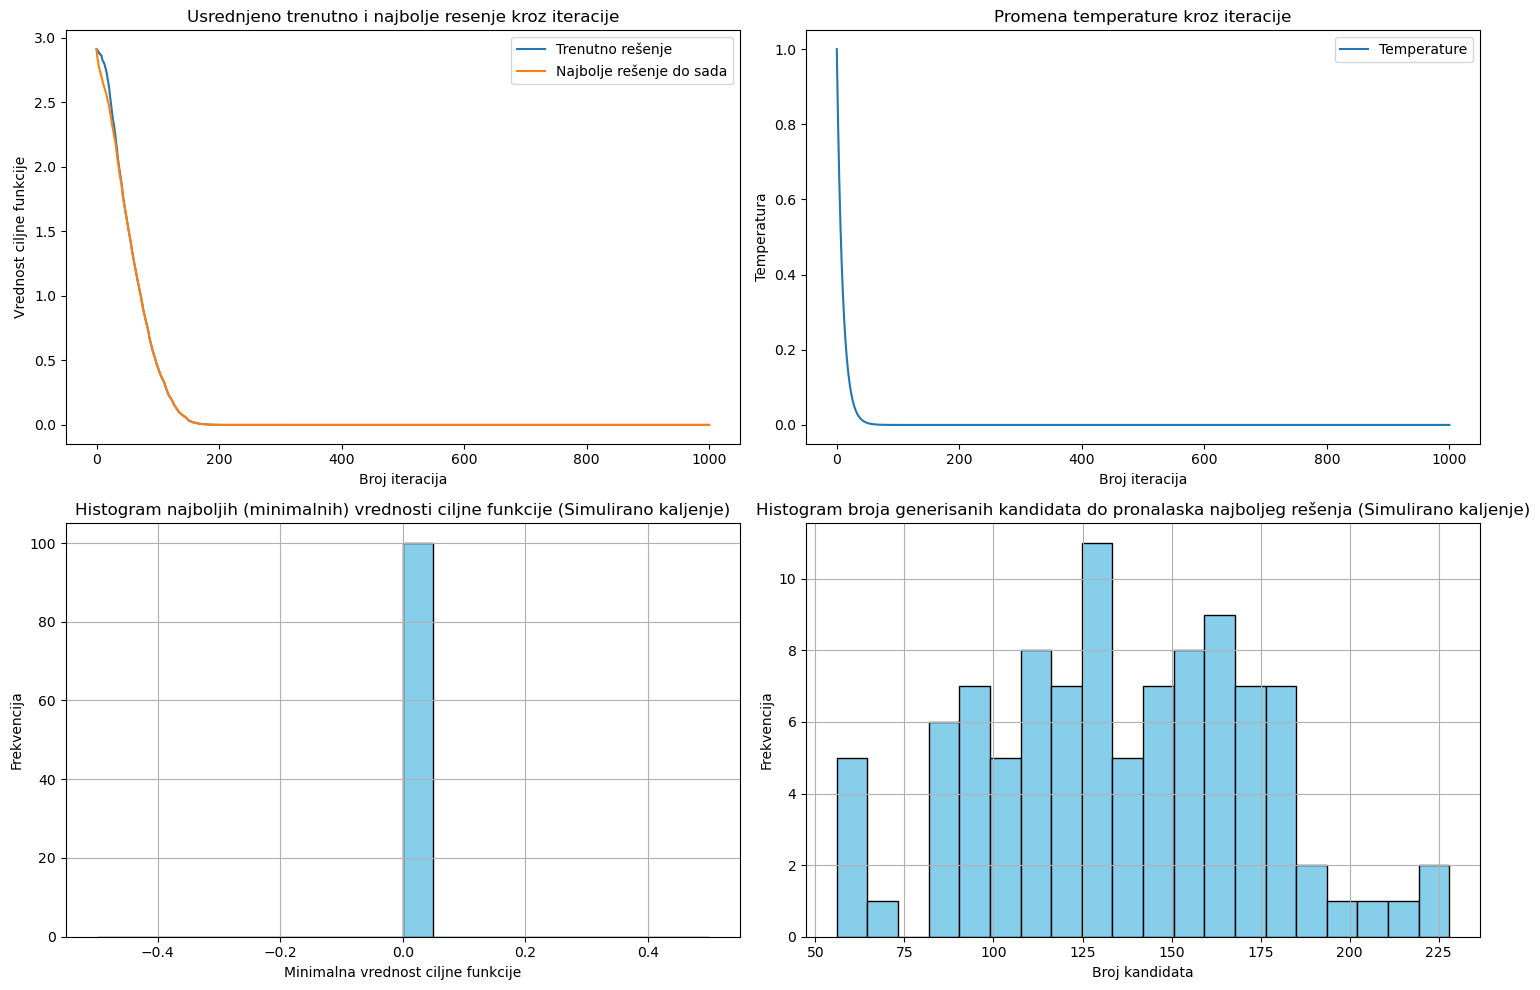

In [67]:
# Experiment za odabrani faktor hlađenja
chosen_cooling_rate = 0.90
all_iterations_to_best, all_min = run_experiment(f, initial_temperature, chosen_cooling_rate, num_iterations)

## Srednji faktor hlađenja (0.90):
U slučaju kada je faktor hlađenja postavljen na 0.9, primećujemo da se vrednosti ciljnih funkcija postepeno smanjuju kako se algoritam izvodi kroz iteracije. U početku, dok je temperatura relativno visoka, primećujemo veće oscilacije u vrednostima ciljnih funkcija, što je u skladu sa očekivanjem da će verovatnoća prihvatanja lošijih rešenja biti veća. Kako temperatura opada, oscilacije postaju manje izražene, a vrednosti funkcija sve više prate trend opadanja, što ukazuje na smanjenje verovatnoće prihvatanja lošijih rešenja. Nakon određenog broja iteracija, temperatura pada na vrednost blisku nuli, što dovodi do zaustavljanja oscilacija i stabilizacije procesa.

Kada je faktor hlađenja 0.9, temperatura će brže padati u poređenju sa većim vrednostima faktora hlađenja, poput 0.99. To znači da će algoritam brže preći sa visokih temperatura na niže, što može rezultirati bržom konvergencijom algoritma ka lokalnom optimumu. Međutim, prebrzo smanjenje temperature može dovesti do toga da algoritam zaglavi u lokalnom optimumu ili da preskoči globalni optimum.

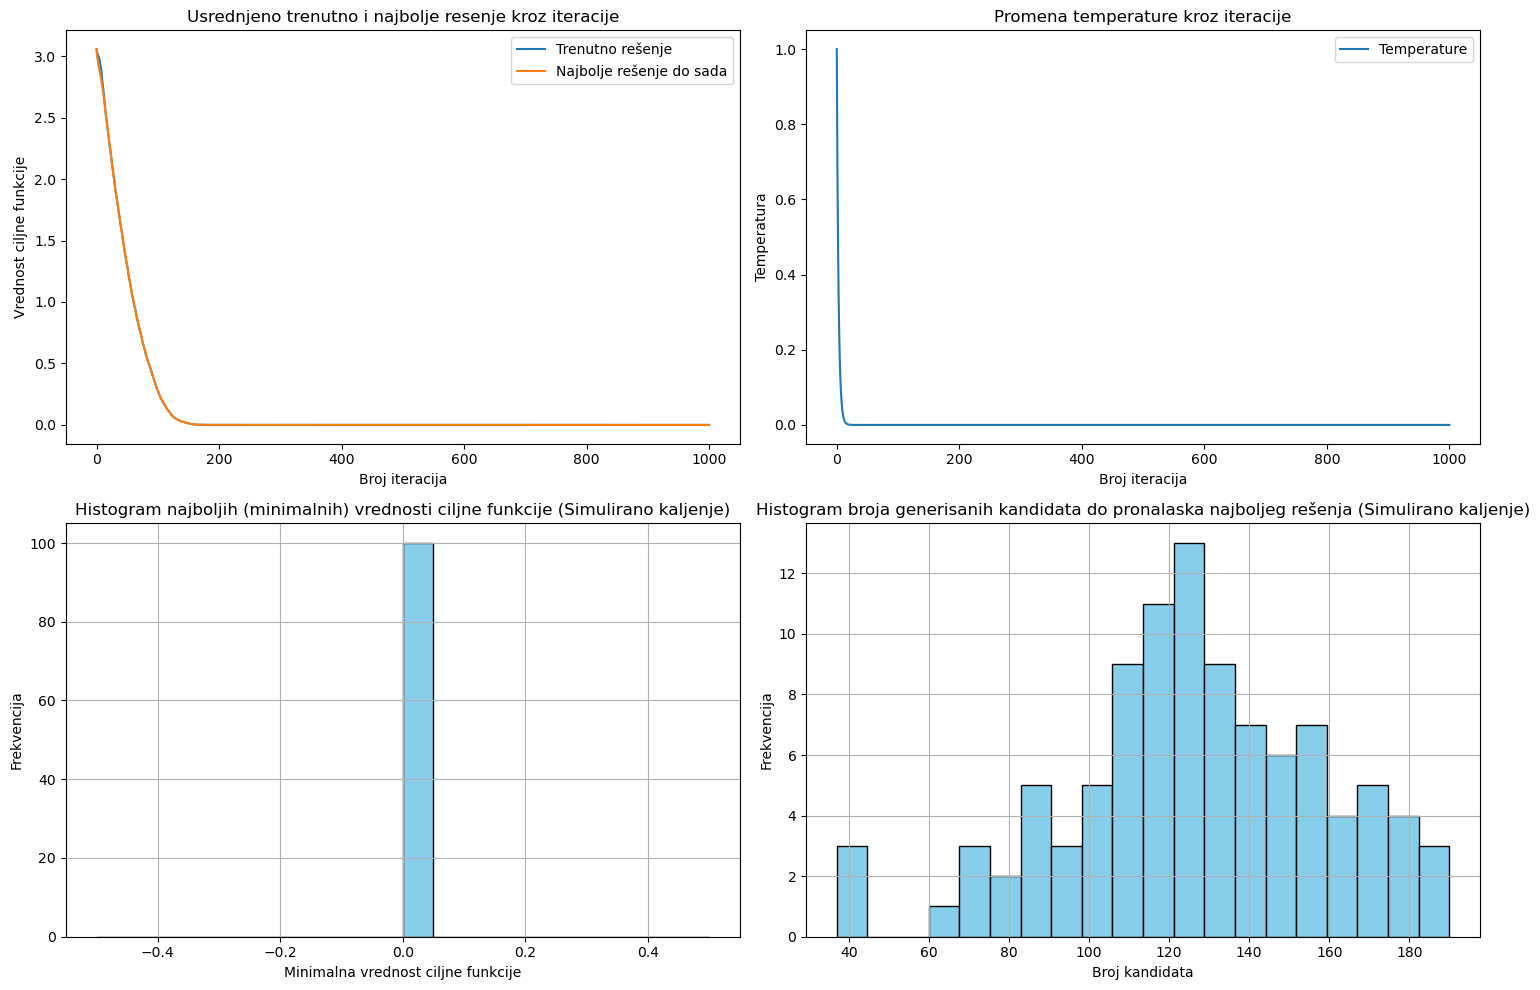

In [60]:
# Experiment za sporiji faktor hlađenja
slower_cooling_rate = 0.70
all_iterations_to_best, all_min = run_experiment(f, initial_temperature, slower_cooling_rate, num_iterations)

## Mali faktor hlađenja (0.70):
Kada je faktor hlađenja 0.7, primetan je brži pad temperature u poređenju sa faktorom hlađenja 0.9. To dovodi do ubrzanog smanjenja oscilacija i bržeg smanjenja vrednosti ciljnih funkcija tokom iteracija.

Kada je faktor hlađenja 0.7, temperatura će se smanjivati brže nego kada je faktor hlađenja 0.9 i 0.99. To znači da će algoritam simuliranog kaljenja brže preći sa visokih temperatura na niže. Brže smanjenje temperature može dovesti do brže konvergencije ka lokalnom optimumu, ali isto tako može uzrokovati da algoritam "preskoči" globalni optimum ako se temperatura suviše brzo smanji pre nego što su svi delovi prostora rešenja dovoljno istraženi.

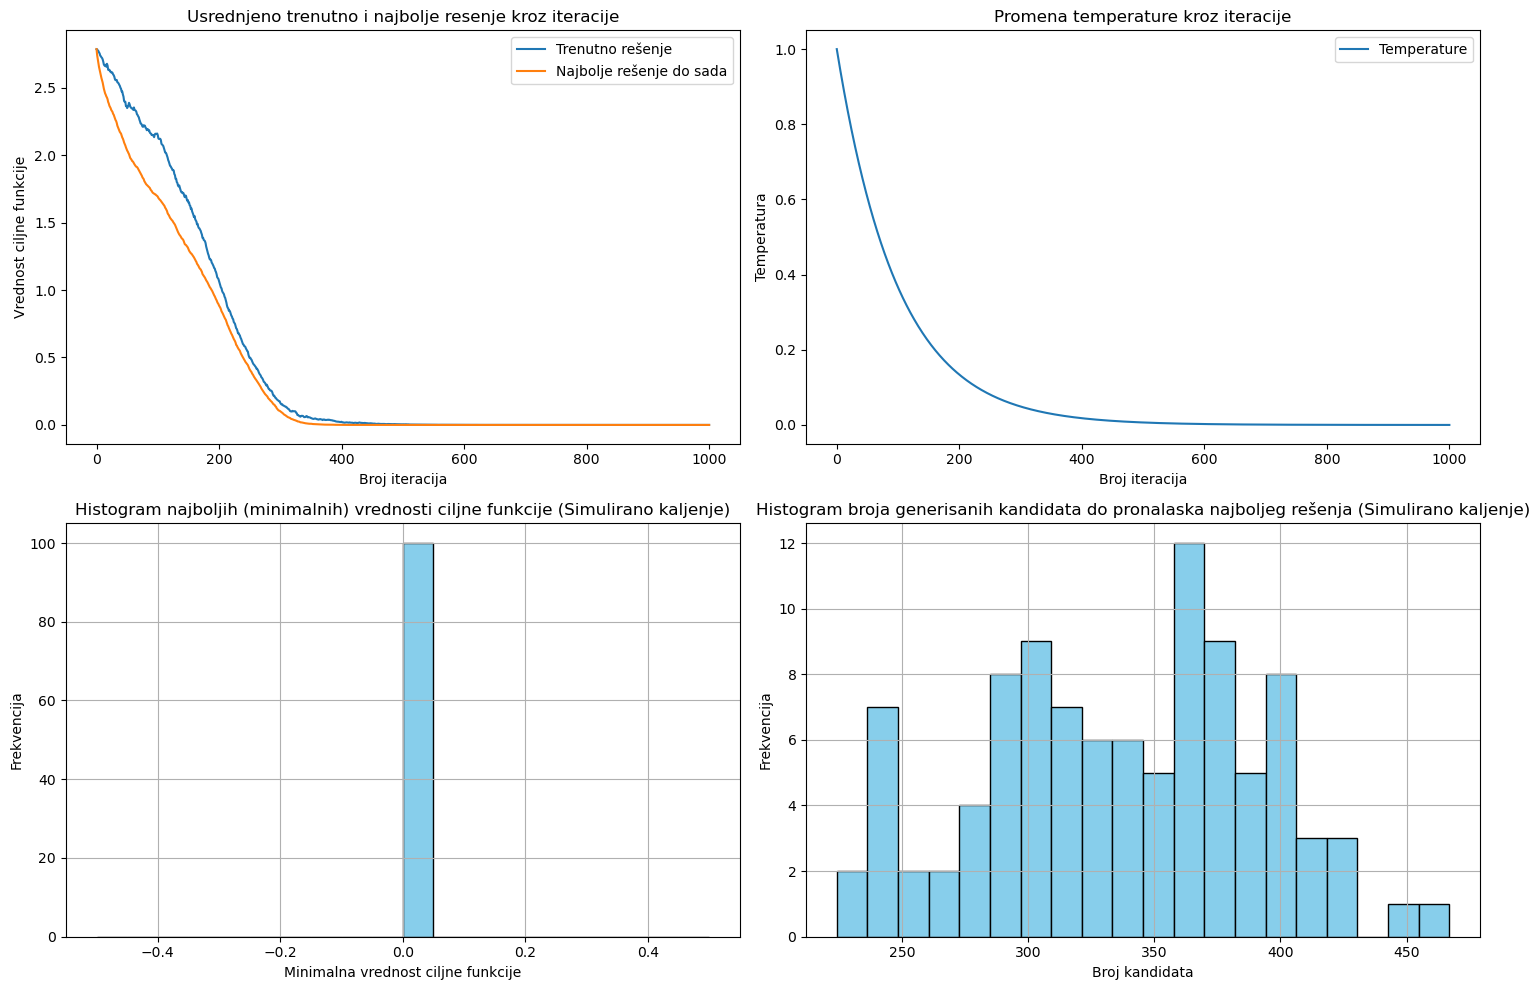

In [150]:
# Experiment za brži faktor hlađenja
faster_cooling_rate = 0.99
all_iterations_to_best, all_min = run_experiment(f, initial_temperature, faster_cooling_rate, num_iterations)

## Veliki faktor hlađenja (0.99):

Sa faktorom hlađenja 0.99, temperatura se smanjuje sporije, što rezultira manjim promenama u vrednostima ciljnih funkcija tokom iteracija.

Sa faktorom hlađenja 0.99, temperatura će se smanjivati veoma sporo. To znači da će algoritam ostati duže na visokim temperaturama, što omogućava više istraživanja prostora rešenja pre nego što se temperatura dovoljno smanji da bi algoritam počeo da konvergira. Sporo smanjenje temperature može pomoći algoritmu da izbegne zaglavljivanje u lokalnom optimumu, ali takođe može dovesti do dužeg vremena izvršavanja algoritma

## Nasumicna pretraga

Nasumična pretraga je vrsta lokalne pretrage koja počinje od početnog rešenja problema, koje ne mora biti optimalno. Zatim se prelazi u stanje koje predstavlja nasumično izabranog neposrednog suseda početnog stanja. Za svako stanje se izračunava vrednost ciljne funkcije, a algoritam se zaustavlja nakon određenog broja iteracija.



In [63]:
# Implementacija funkcije za nasumičnu pretragu
def random_search(f):
    
    """
    Implementira algoritam nasumične pretrage za optimizaciju ciljne funkcije.

    Args:
    - f: Ciljna funkcija koju treba minimizovati.

    Returns:
    - all_iterations_to_best: Lista broja iteracija do najboljeg rešenja po eksperimentima.
    - all_min: Lista minimalnih vrednosti ciljne funkcije po eksperimentima.
    """
    
    num_trials = 100  # Broj ponavljanja eksperimenta
    num_iterations = 1000  # Broj iteracija u svakom eksperimentu
    
    all_solutions = []  # Lista za čuvanje svih vrednosti ciljne funkcije za trenutno rešenje
    all_best_solutions = []  # Lista za čuvanje svih vrednosti ciljne funkcije za najbolje pronađeno rešenje
    all_iterations_to_best = []  # Lista za čuvanje broja iteracija do najboljeg rešenja
    all_min = [] # Lista za cuvanje najboljih min vrednosti za svaki eksperiment

    # Petlja koja izvršava nasumičnu pretragu za svaki od num_trials eksperimenata
    for _ in range(num_trials):
        
        # Generisanje početnog rešenja za svaki eksperiment
        initial_solution = generate_initial_solution()

        current_solution = initial_solution
        best_solution = initial_solution
        best_value = f(initial_solution)

        solutions = [best_value]
        best_solutions = [best_value]

        # Petlja koja izvršava nasumičnu pretragu za num_iterations iteracija
        for _ in range(1, num_iterations):
            neighbor_solution = generate_neighbor(current_solution)
            neighbor_value = f(neighbor_solution)

            if neighbor_value < best_value:
                best_solution = neighbor_solution
                best_value = neighbor_value

            solutions.append(neighbor_value)
            best_solutions.append(best_value)

        all_solutions.append(solutions)
        all_best_solutions.append(best_solutions)
        
        # Pronalaženje indeksa najbolje vrednosti ciljne funkcije u listi najboljih rešenja
        best_index = np.argmin(best_solutions)

        # Broj iteracija do najboljeg rešenja
        iterations_to_best = best_index + 1  # Dodajemo 1 jer indeksi počinju od 0

        # Dodavanje broja iteracija do najboljeg rešenja u listu
        all_iterations_to_best.append(iterations_to_best)

        # Dodavanje najbolje(min) vrednosti funkcije u listu
        all_min.append(best_value)

        # Ispisujemo korake
        #print(f"Nasumicna pretraga rešenje: {best_solution}, Vrednost: {best_value}")

    # Izračunavanje srednje vrednosti ciljne funkcije po iteracijama
    avg_solutions = np.mean(all_solutions, axis=0)
    avg_best_solutions = np.mean(all_best_solutions, axis=0)

    # Prikazivanje grafika nasumične pretrage, histograma broja generisanih kandidata i histograma najboljih vrednosti ciljne funkcije
    plt.figure(figsize=(15, 5))

    # Prvi grafik: Zavisnost rešenja od broja iteracija
    plt.subplot(1, 3, 1)
    plt.plot(avg_solutions, label='Trenutno rešenje')
    plt.plot(avg_best_solutions, label='Najbolje rešenje do sada')
    plt.xlabel('Broj iteracija')
    plt.ylabel('Vrednost ciljne funkcije')
    plt.title('Zavisnost rešenja od broja iteracija')
    plt.legend()

    # Drugi grafik: Histogram broja generisanih kandidata do pronalaska najboljeg rešenja 
    plt.subplot(1, 3, 2)
    plt.hist(all_iterations_to_best, bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram br. generisanih kandidata do pronalaska najboljeg rešenja')
    plt.xlabel('Broj kandidata')
    plt.ylabel('Frekvencija')
    plt.grid(True)

    # Treći grafik: Histogram najboljih (minimalnih) vrednosti ciljne funkcije 
    plt.subplot(1, 3, 3)
    plt.hist(all_min, bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram (minimalnih) vrednosti ciljne funkcije')
    plt.xlabel('Minimalna vrednost ciljne funkcije')
    plt.ylabel('Frekvencija')
    plt.grid(True)

    plt.tight_layout()  
    plt.show()
    
    return  all_iterations_to_best, all_min

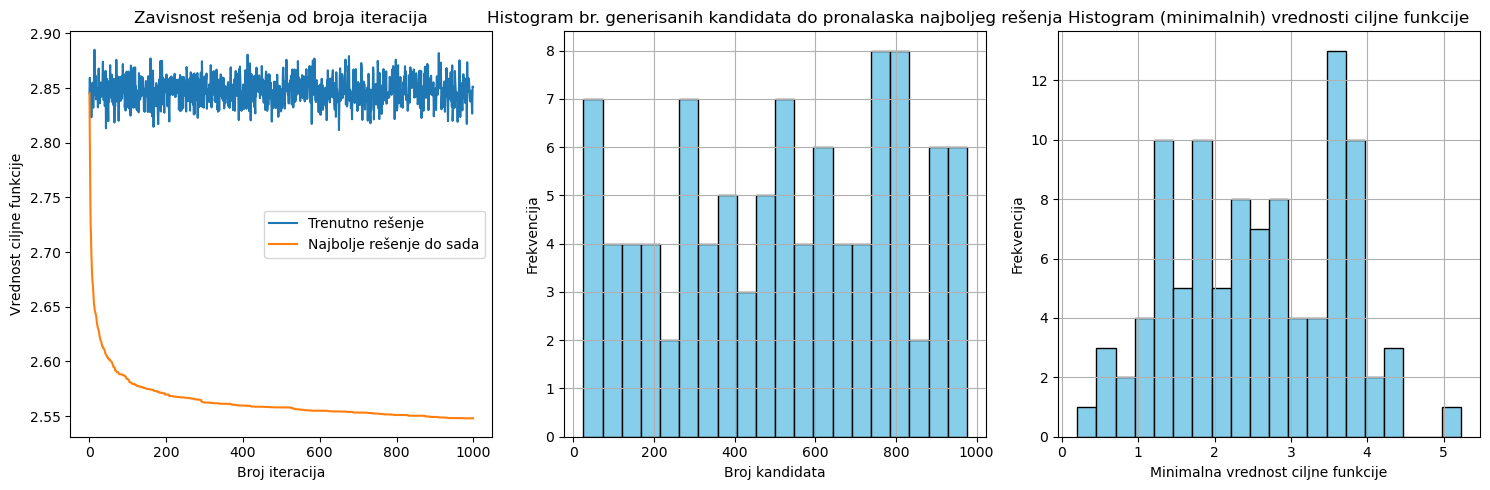

In [64]:
# Experiment za nasumičnu pretragu
random_all_iterations_to_best, random_all_min = random_search(f)

min_min = float('inf')
min_iter = 0

for i in range(len(random_all_min)):
    
    if random_all_min[i] < min_min:
        min_min = random_all_min[i]
        min_iter = i

print('Najbolje resenje:', min_min)
print('Iteracija:', min_iter)

Najbolje resenje: 0.2728247380357076

Iteracija: 25

## Zavisnost rešenja od broja iteracija:
Grafik pokazuje nepravilnu, slučajnu fluktuaciju vrednosti ciljne funkcije tokom iteracija.

## Histogram broja generisanih kandidata do pronalaska najboljeg rešenja:
Distribucija broja generisanih kandidata do pronalaska najboljeg rešenja je ravnomerna. Histogram pokazuje široku raspodelu kandidata koji su generisani pre pronalaska optimalnog rešenja.

In [68]:
# Izračunavanje srednjih vrednosti i standardnih devijacija za simulirano kaljenje
simulated_annealing_candidates_mean = np.mean([all_iterations_to_best])
simulated_annealing_candidates_std = np.std([all_iterations_to_best])
simulated_annealing_min_values_mean = np.mean([all_min])
simulated_annealing_min_values_std = np.std([all_min])

# Izračunavanje srednjih vrednosti i standardnih devijacija za nasumičnu pretragu
random_search_candidates_mean = np.mean(random_all_iterations_to_best)
random_search_candidates_std = np.std(random_all_iterations_to_best)
random_search_min_values_mean = np.mean(random_all_min)
random_search_min_values_std = np.std(random_all_min)

# Prikazivanje rezultata u obliku tablice
print("Simulirano kaljenje:")
print("---------------------------------------------------------------------")
print("Srednja vrednost broja generisanih kandidata:", simulated_annealing_candidates_mean)
print("Standardna devijacija broja generisanih kandidata:", simulated_annealing_candidates_std)
print("Srednja vrednost minimalnih vrednosti ciljne funkcije:", simulated_annealing_min_values_mean)
print("Standardna devijacija minimalnih vrednosti ciljne funkcije:", simulated_annealing_min_values_std)
print("---------------------------------------------------------------------")
print("Nasumična pretraga:")
print("---------------------------------------------------------------------")
print("Srednja vrednost broja generisanih kandidata:", random_search_candidates_mean)
print("Standardna devijacija broja generisanih kandidata:", random_search_candidates_std)
print("Srednja vrednost minimalnih vrednosti ciljne funkcije:", random_search_min_values_mean)
print("Standardna devijacija minimalnih vrednosti ciljne funkcije:", random_search_min_values_std)
print("---------------------------------------------------------------------")


Simulirano kaljenje:
---------------------------------------------------------------------
Srednja vrednost broja generisanih kandidata: 135.41
Standardna devijacija broja generisanih kandidata: 37.651585623981354
Srednja vrednost minimalnih vrednosti ciljne funkcije: 0.0
Standardna devijacija minimalnih vrednosti ciljne funkcije: 0.0
---------------------------------------------------------------------
Nasumična pretraga:
---------------------------------------------------------------------
Srednja vrednost broja generisanih kandidata: 522.32
Standardna devijacija broja generisanih kandidata: 280.27057926225507
Srednja vrednost minimalnih vrednosti ciljne funkcije: 2.54790151444531
Standardna devijacija minimalnih vrednosti ciljne funkcije: 1.0803096025804684
---------------------------------------------------------------------


## Diferencijalna evolucija



In [98]:
# Definisanje ciljne funkcije
def target_function(x):
    return 4/3 * (x[0]**2 + x[1]**2 - x[0] * x[1])**0.75 + x[2]

## Inicijalizacija

Populacija se formira početnim rešenjima, nasumično generisanim vektorima fiksne dimenzije. Za svaku koordinatu svakog vektora, vrednosti se biraju slučajno unutar određenog opsega. Veličina populacije se definiše prema potrebama problema.

In [92]:
def initialize_population(pop_size):
    
    """
    Inicijalizuje populaciju jedinki.

    Args:
    - pop_size: Veličina populacije.

    Returns:
    - population: Inicijalizovana populacija jedinki.
    """
    
    population = np.random.uniform(0, 2, (pop_size, 3))
    return population

## Mutacija

Mutacija se postiže kombinovanjem tri slučajno odabrana rešenja iz populacije. Ova tri rešenja su međusobno različita i različita od trenutnog rešenja. Mutacija se sastoji od dodavanja razlike između dva rešenja, pomnožene faktorom mutacije F, trenutnom rešenju. Ova tehnika dobija naziv "diferencijalna" zbog ovog procesa. Nakon mutacije, vrednosti koje prelaze granice dozvoljenog opsega se ograničavaju na odgovarajuće granice.

In [93]:
# Mutacija
def mutate(population, F, bounds):
    
    """
    Vrši mutaciju populacije koristeći diferencijalnu evoluciju.

    Args:
    - population: Populacija jedinki koje se mutiraju.
    - F: Faktor skaliranja za mutaciju.
    - bounds: Granice za svaku promenljivu ciljne funkcije.

    Returns:
    - mutated_population: Mutirana populacija.
    """
    
    # Dobijanje veličine populacije i dimenzije vektora rešenja
    pop_size, dim = population.shape
    
    # Inicijalizacija niza za mutiranu populaciju
    mutated_population = np.zeros_like(population)
    
    # Iteriranje kroz svaku jedinku u populaciji
    for i in range(pop_size):
        
        # Generisanje slučajno izabranih indeksa za formiranje različitih kombinacija
        indices = list(range(pop_size))
        indices.remove(i)  # Uklanjanje trenutnog indeksa
        # Generisanje slučajno izabranih indeksa
        a, b, c = np.random.choice(indices, 3, replace=False)
        
        # Mutacija prema DE algoritmu
        mutant = population[c] + F * (population[b] - population[a])
        
        # Ograničavanje mutiranog vektora unutar granica
        #mutant = np.clip(mutant, bounds[0], bounds[1])
        # Ograničavanje mutanta unutar granica
        for j in range(dim):
            mutant[j] = np.clip(mutant[j], bounds[j][0], bounds[j][1])
        
        # Dodavanje mutiranog vektora u mutiranu populaciju
        mutated_population[i] = mutant
    
    return mutated_population

## Ukrštanje
Ukrštanje kombinuje trenutno rešenje sa mutacijom dobijenom u prethodnom koraku. Ovo se postiže uzimajući u obzir verovatnoću ukrštanja (crossover_rate). Za svaku koordinatu trenutnog rešenja, postoji određena verovatnoća da će biti zamenjena koordinatom mutacije.

In [94]:
# Ukrstanje
def crossover(population, mutated_population, crossover_rate):
    
    """
    Vrši ukrštanje između populacije i mutirane populacije na osnovu datog crossover_rate.

    Args:
    - population: Originalna populacija.
    - mutated_population: Populacija koja je mutirana.
    - crossover_rate: Verovatnoća ukrštanja.

    Returns:
    - crossed_population: Nova populacija koja je prošla kroz ukrštanje.
    """
    
    # Inicijalizacija novog niza za populaciju koja je prošla kroz ukrštanje
    crossed_population = np.zeros_like(population)
    
    # Iteriranje kroz svaku jedinku u populaciji
    for i in range(population.shape[0]):
        # Kopiranje trenutne jedinke kako bismo je mogli modifikovati u ukrštanju
        crossed_solution = np.copy(population[i])
        
        # Iteriranje kroz svaku koordinatu jedinke
        for j in range(len(crossed_solution)):
            # Generisanje slučajnog broja između 0 i 1
            random_num = np.random.random()
            
            # Ako je generisani broj manji od crossover_rate, vršimo zamenu koordinate sa mutiranom jedinkom
            if random_num < crossover_rate:
                crossed_solution[j] = mutated_population[i][j]
        
        # Dodavanje modifikovane jedinke u populaciju koja je prošla kroz ukrštanje
        crossed_population[i] = crossed_solution
    
    # Vraćanje populacije koja je prošla kroz ukrštanje
    return crossed_population

## Selekcija
Za svaku novu jedinku dobijenu ukrštanjem, izračunavaju se vrednosti ciljnih funkcija za obe jedinke - originalnu i novu. Ako je vrednost ciljne funkcije za novu jedinku manja od vrednosti za originalnu, nova jedinka zamenjuje originalnu u populaciji.

In [95]:
# Selekcija
def select(population, crossed_population, target_function):
    
    """
    Selekcija između originalne populacije i populacije koja je prošla kroz ukrštanje na osnovu ciljne funkcije.

    Args:
    - population: Originalna populacija.
    - crossed_population: Populacija koja je prošla kroz ukrštanje.
    - target_function: Ciljna funkcija koja se optimizuje.

    Returns:
    - new_population: Nova populacija koja sadrži odabrane jedinke.
    """
    
    # Inicijalizacija nove populacije
    new_population = np.zeros_like(population)
    
    # Iteriranje kroz svaku jedinku u populaciji
    for i in range(population.shape[0]):
        
        # Provera da li je mutirana jedinka bolja od trenutne
        if target_function(crossed_population[i]) < target_function(population[i]):
            # Ako je mutirana jedinka bolja, dodajemo je u novu populaciju
            new_population[i] = crossed_population[i]
        else:
            # Ako nije, zadržavamo trenutnu jedinku u novoj populaciji
            new_population[i] = population[i]
    
    return new_population

In [158]:
def optimize(target_function, pop_size=10, F=0.75, crossover_rate=0.6, max_generations=1000, tol=1e-6):
    
    """
    Optimizuje ciljnu funkciju koristeći diferencijalnu evoluciju.

    Args:
    - target_function: Ciljna funkcija koja se optimizuje.
    - bounds: Lista granica za svaku promenljivu ciljne funkcije.
    - pop_size: Veličina populacije (podrazumevana vrednost: 100).
    - F: Faktor skaliranja za mutaciju (podrazumevana vrednost: 0.5).
    - crossover_rate: Verovatnoća ukrštanja (podrazumevana vrednost: 0.5).
    - max_generations: Maksimalan broj generacija (podrazumevana vrednost: 1000).
    - tol: Tolerancija zaustavljanja (podrazumevana vrednost: 1e-6).

    Returns:
    - Najbolje pronađeno rešenje.
    - Vrednost ciljne funkcije za najbolje pronađeno rešenje.
    
    """
    
    # Inicijalizacija populacije
    population = initialize_population(pop_size)
    #print('Dimenzije populacije:', population.shape)
    
    # Lista za čuvanje srednjih vrednosti ciljne funkcije po generacijama
    mean_fitness_per_generation = []
    
    # Iteriranje kroz generacije
    for generation in range(max_generations):
        
        # Mutacija populacije
        mutated_population = mutate(population, F, bounds)
        #print('Dimenzije mutirane populacije:', mutated_population.shape)
        
        # Ukrštanje populacije
        crossed_population = crossover(population, mutated_population, crossover_rate)
        #print('Dimenzije ukrstene populacije:',crossed_population.shape)
        
        # Selekcija između originalne populacije i populacije koja je prošla kroz ukrštanje
        population = select(population, crossed_population, target_function)
        
        # Izračunavanje srednje vrednosti ciljne funkcije po jedinkama u generaciji
        mean_fitness = np.mean(target_function(population))
        mean_fitness_per_generation.append(mean_fitness)
        
        # Provera konvergencije
        if np.max(np.abs(target_function(population) - target_function(crossed_population))) < tol:
            # Ako je ostvarena konvergencija, prekidamo iteraciju kroz generacije
            break
            
    #Ova provera konvergencije pomaže u efikasnom zaustavljanju algoritma kada se postigne zadovoljavajući nivo konvergencije,
    #umesto nastavljanja iteracija do dostizanja maksimalnog broja generacija.
    
    # Pronalaženje najboljeg rešenja i njegova evaluacija
    best_solution = population[np.argmin(target_function(population))]
    
    return best_solution, target_function(best_solution), mean_fitness_per_generation

In [159]:
# Pokretanje optimizacije
best_solution, best_value, mean_fitness_per_generation = optimize(target_function)
print("Najbolje rešenje:", best_solution)
print("Minimalna vrednost funkcije:", min_value)

Najbolje rešenje: [0. 0. 0.]
Minimalna vrednost funkcije: 1.8779760092251083


In [160]:
def run_experiment_DE(target_function, pop_size=10, F=0.5, crossover_rate=0.5, max_generations=1000, num_experiments=100):
    
    """
    Izvršava seriju eksperimenata diferencijalnom evolucijom za optimizaciju ciljne funkcije.

    Args:
    - target_function: Ciljna funkcija koja se optimizuje.
    - pop_size: Veličina populacije (podrazumevana vrednost: 100).
    - F: Faktor skaliranja za mutaciju (podrazumevana vrednost: 0.5).
    - crossover_rate: Verovatnoća ukrštanja (podrazumevana vrednost: 0.5).
    - max_generations: Maksimalan broj generacija (podrazumevana vrednost: 1000).
    - num_experiments: Broj eksperimenata koji će biti izvršeni (podrazumevana vrednost: 100).

    Returns:
    - all_best_solutions: Lista najboljih vrednosti ciljne funkcije po eksperimentima.
    - all_iterations_to_best: Lista broja iteracija do najboljeg rešenja po eksperimentima.
    """
    
    all_best_solutions = []  # Lista za čuvanje najboljih rešenja po eksperimentima
    all_iterations_to_best = []  # Lista za čuvanje broja iteracija do najboljeg rešenja po eksperimentima

    # Pokretanje eksperimenata
    for _ in range(num_experiments):
        best_solution, best_value = optimize(target_function, pop_size, F, crossover_rate, max_generations)
        all_best_solutions.append(best_value)

        # Pronalaženje broja iteracija do najboljeg rešenja
        population = initialize_population(pop_size)
        for generation in range(max_generations):
            mutated_population = mutate(population, F, bounds)
            crossed_population = crossover(population, mutated_population, crossover_rate)
            population = select(population, crossed_population, target_function)

            if np.min(target_function(population)) <= best_value:
                all_iterations_to_best.append(generation)
                break

    return all_best_solutions, all_iterations_to_best

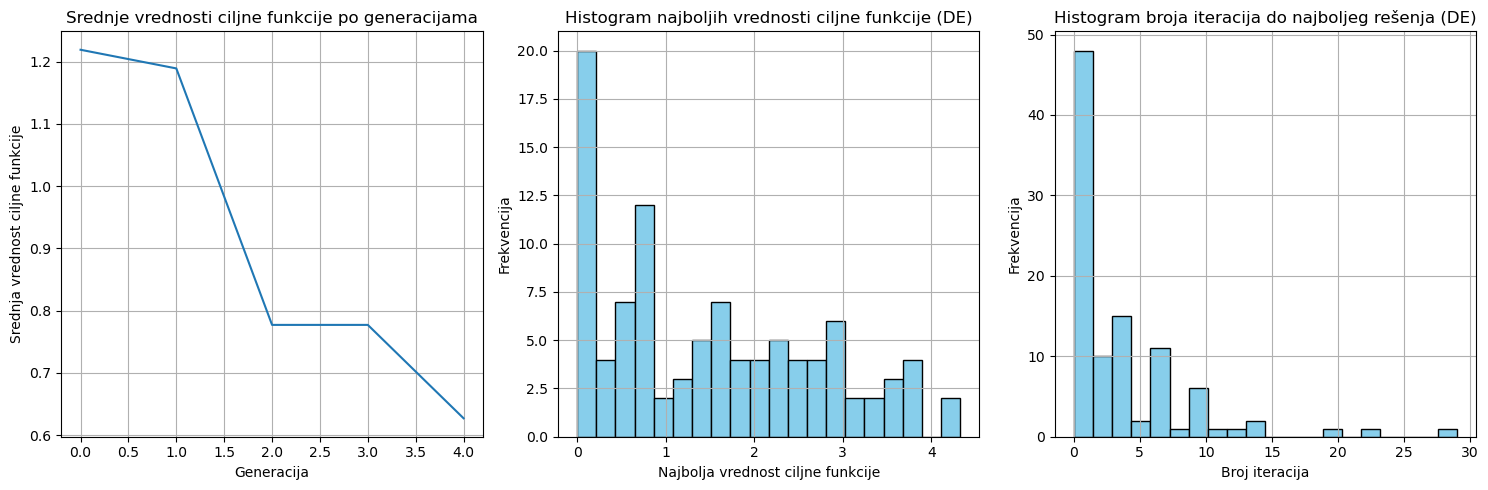

In [161]:
# Parametri diferencijalne evolucije
pop_size = 10
F = 0.75
crossover_rate = 0.6
max_generations = 10
num_experiments = 100

# Pokretanje eksperimenata
best_solution, best_value, mean_fitness_per_generation = optimize(target_function, pop_size, F, crossover_rate, max_generations)

# Postavljanje veličine figure
plt.figure(figsize=(15, 5))

# Prikaz srednjih vrednosti ciljne funkcije po generacijama
plt.subplot(1, 3, 1)
plt.plot(mean_fitness_per_generation)
plt.title('Srednje vrednosti ciljne funkcije po generacijama')
plt.xlabel('Generacija')
plt.ylabel('Srednja vrednost ciljne funkcije')
plt.grid(True)

# Histogram najboljih rešenja
plt.subplot(1, 3, 2)
plt.hist(best_solutions, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram najboljih vrednosti ciljne funkcije (DE)')
plt.xlabel('Najbolja vrednost ciljne funkcije')
plt.ylabel('Frekvencija')
plt.grid(True)

# Histogram broja iteracija do najboljeg rešenja
plt.subplot(1, 3, 3)
plt.hist(iterations_to_best, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram broja iteracija do najboljeg rešenja (DE)')
plt.xlabel('Broj iteracija')
plt.ylabel('Frekvencija')
plt.grid(True)

# Prikazivanje grafova
plt.tight_layout()
plt.show()

##  Uticaj veličine populacije na performanse DE algoritma
Veće populacije imaju tendenciju da brže konvergiraju ka optimalnom rešenju, ali istovremeno zahtevaju više vremena za procesuiranje. 

## Uticaj broja iteracija na performanse DE algoritma

Postoji opadanje vrednosti ciljne funkcije kako se povećava broj iteracija. Ovo ukazuje na to da se algoritam kreće u dobrom smeru ka minimumu funkcije kako se više iterira. Takođe, primetno je da veći broj iteracija omogućava preciznije i tačnije konvergiranje algoritma ka optimalnom rešenju.